In [ ]:
!pip install matplotlib scipy scikit-learn --quiet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/processed_data.csv')
print("Shape of data:", df.shape)
df.head()

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
linked = linkage(scaled_data, method='ward')

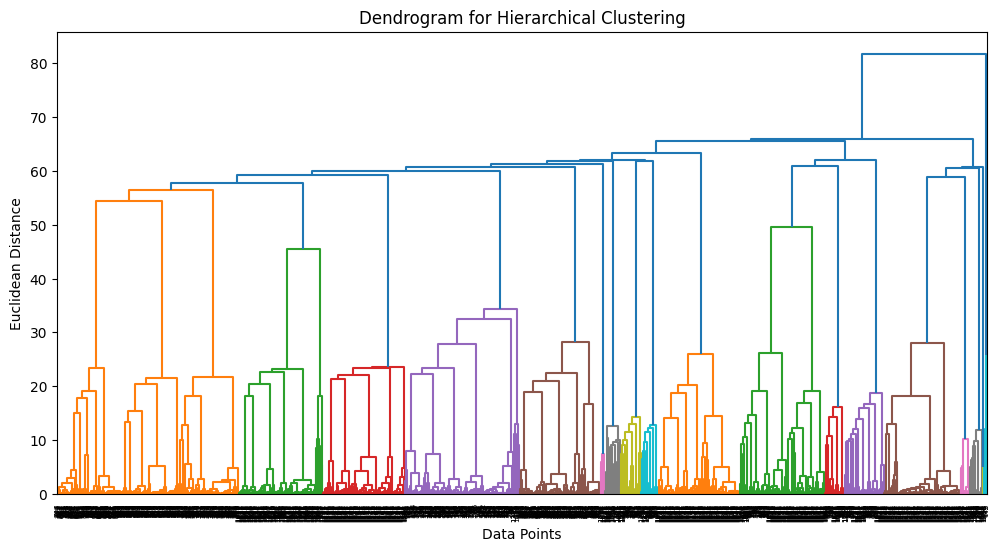

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Cluster'] = cluster.fit_predict(scaled_data)
#I choose the number of clusters because I got silhouette score of 0.661 which is excellent for 2 clusters .

In [ ]:
print(df['Cluster'].value_counts())
sns.pairplot(df_numeric.join(df['Cluster']), hue='Cluster', palette='Set1')
plt.show()

Cluster
0    1850
1       6
Name: count, dtype: int64


Full dataset shape used: (1856, 29)


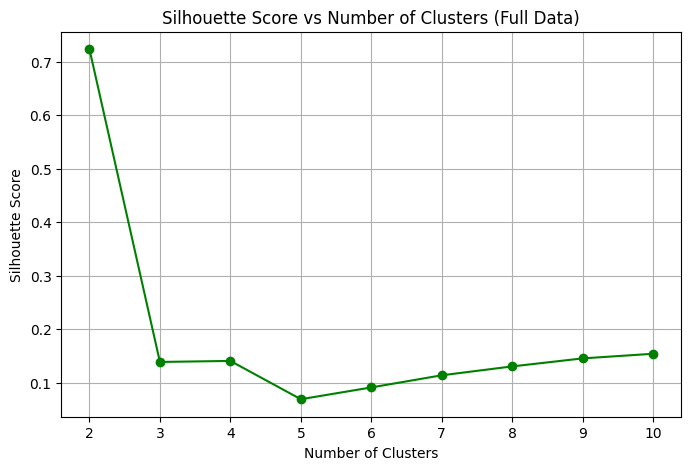

In [19]:
# Step 1: Load and preprocess full data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/processed_data.csv')  # Adjust path if needed

# Keep numeric data and drop missing values
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()
print("Full dataset shape used:", df_numeric.shape)

# Scale the full data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Step 2: Calculate and plot silhouette scores
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Step 3: Plot the scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title("Silhouette Score vs Number of Clusters (Full Data)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(cluster_range)
plt.show()
